# question 1


In [8]:
import pandas as pd
import zipfile
import json
import os

def extract_performance_data(file_directory):
    # Read the JSON file
    df = pd.read_json(file_directory)

    # Extract participant data
    participants = pd.DataFrame(df.loc['participants'].iloc[0])
    calories = participants['calories']
    participant_list = []
    for index, row in participants.iterrows():
        splits = pd.DataFrame(row["splits"])

        participant_data = {
            'participant': row['participant'],
            'time_on_2000m': row['time'],  # Total time on 2000m
            'avg_pace_on_2000m': row['avg_pace'],  # Average pace on 2000m
            'nb_coups_rame_sur_2000m': splits['split_stroke_count'].sum(),  # Total stroke count
            'avg_stroke_rate_2000m': row['spm'],  # Average stroke rate
        }

        for i in range(len(splits)):
            split_time = splits.iloc[i]['split_time']
            split_stroke_count = splits.iloc[i]['split_stroke_count']
            split_avg_pace = splits.iloc[i]['split_avg_pace']

            split_cadence = split_stroke_count / (split_time/60)  #

            participant_data[f'temp_split_{i+1}_500m'] = split_time
            participant_data[f'cadence_split_{i+1}_500m'] = split_cadence
            participant_data[f'nb_coups_rame_split_{i+1}_500m'] = split_stroke_count

        participant_list.append(participant_data)

    df_participants = pd.DataFrame(participant_list)
    df_participants['calories'] = calories
    return df_participants

def list_json_files(zip_path, extract_folder='extracted_files'):
    json_files = []

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

        json_files = [os.path.join(extract_folder, file) for file in os.listdir(extract_folder) if file.endswith('.json')]

    return json_files

zip_file_path = "/content/Test .zip"
json_files = list_json_files(zip_file_path)

combined_data = pd.concat([extract_performance_data(file) for file in json_files], ignore_index=True)

# Display the final DataFrame
combined_data.drop(columns=['avg_pace_on_2000m'], inplace=True)
combined_data


,participant,time_on_2000m,nb_coups_rame_sur_2000m,avg_stroke_rate_2000m,temp_split_1_500m,cadence_split_1_500m,nb_coups_rame_split_1_500m,temp_split_2_500m,cadence_split_2_500m,nb_coups_rame_split_2_500m,temp_split_3_500m,cadence_split_3_500m,nb_coups_rame_split_3_500m,temp_split_4_500m,cadence_split_4_500m,nb_coups_rame_split_4_500m,calories
0,Maxime,6:33.4,186,28,1016,2.598425,44,1020,2.529412,43,976,2.889344,47,921,3.387622,52,171
1,Célestin,7:01.8,199,28,1031,2.677013,46,1069,2.469598,44,1073,2.795899,50,1044,3.390805,59,154
2,Julien,7:47.0,210,26,1164,2.474227,48,1205,2.439834,49,1152,2.812500,54,1148,3.083624,59,135
3,Neve,8:12.4,229,27,1235,2.623482,54,1272,2.452830,52,1228,2.833876,58,1188,3.282828,65,128
4,Eric,7:57.3,219,27,1194,2.814070,56,1212,2.623762,53,1212,2.673267,54,1155,2.909091,56,131
5,Edouard,8:03.7,242,30,1148,3.083624,59,1255,2.868526,60,1253,2.920990,61,1181,3.149873,62,130
6,Baptiste,8:21.1,208,24,1186,2.681282,53,1254,2.392344,50,1307,2.249426,49,1265,2.656126,56,125
7,Loïs,8:24.1,254,30,1191,3.073048,61,1302,2.857143,62,1294,3.013910,65,1254,3.157895,66,124
8,Léa,8:21.9,241,28,1183,3.093829,61,1246,2.696629,56,1299,2.771363,60,1292,2.972136,64,125
9,Orlane,8:49.7,272,30,1303,3.085188,67,1341,2.908277,65,1332,2.972973,66,1321,3.361090,74,118


# question 2





In [9]:
import pandas as pd

# Convertir le temps au format minutes:secondes en secondes
def time_to_seconds(time_str):
    if isinstance(time_str, str):
        minutes, seconds = time_str.split(':')
        return int(minutes) * 60 + float(seconds)
    return time_str

# Convertir les secondes en heures pour les calculs de vitesse
def seconds_to_hours(seconds):
    return seconds / 3600

# Calculer la vitesse moyenne en km/h
def calculate_speed_kmh(distance_km, time_seconds):
    time_hours = seconds_to_hours(time_seconds)
    return distance_km / time_hours if time_hours > 0 else 0

# Calculer la longueur moyenne par coup de rame (en mètres par coup)
def calculate_length_per_stroke(distance_m, stroke_count):
    return distance_m / stroke_count if stroke_count > 0 else 0

# Supposons que 'combined_data' soit ton DataFrame contenant toutes les données
# Ajout des colonnes pour la vitesse et la longueur moyenne
def calculate_additional_metrics(df):
    # Vitesse moyenne sur 2000m (2 km)
    ds = pd.DataFrame()
    ds['particpant'] = df['participant']
    ds['vitesse_moyenne_2000m_kmh'] = df.apply(
        lambda row: calculate_speed_kmh(2, time_to_seconds(row['time_on_2000m'])),
        axis=1
    )

    # Longueur moyenne par coup de rame sur 2000m (2000 mètres)
    ds['longueur_moyenne_2000m_par_coup'] = df.apply(
        lambda row: calculate_length_per_stroke(2000, row['nb_coups_rame_sur_2000m']),
        axis=1
    )

    # Vitesse moyenne et longueur par coup de rame pour chaque portion de 500m
    for i in range(1, 5):
        # Calcul de la vitesse moyenne sur chaque portion de 500m (0.5 km)
        ds[f'vitesse_moyenne_split_{i}_kmh'] = df.apply(
            lambda row: calculate_speed_kmh(0.5,time_to_seconds(row[f'temp_split_{i}_500m'])),
            axis=1
        )

        # Calcul de la longueur moyenne par coup de rame sur chaque portion de 500m (500 mètres)
        ds[f'longueur_moyenne_split_{i}_par_coup'] = df.apply(
            lambda row: calculate_length_per_stroke(500, row[f'nb_coups_rame_split_{i}_500m']),
            axis=1
        )

    return ds

# Appliquer la fonction pour ajouter les nouvelles colonnes à ton DataFrame
df_result_question_2 = calculate_additional_metrics(combined_data)

# Afficher les résultats
df_result_question_2


,particpant,vitesse_moyenne_2000m_kmh,longueur_moyenne_2000m_par_coup,vitesse_moyenne_split_1_kmh,longueur_moyenne_split_1_par_coup,vitesse_moyenne_split_2_kmh,longueur_moyenne_split_2_par_coup,vitesse_moyenne_split_3_kmh,longueur_moyenne_split_3_par_coup,vitesse_moyenne_split_4_kmh,longueur_moyenne_split_4_par_coup
0,Maxime,18.301983,10.752688,1.771654,11.363636,1.764706,11.627907,1.844262,10.638298,1.954397,9.615385
1,Célestin,17.069701,10.050251,1.745878,10.869565,1.683817,11.363636,1.677540,10.000000,1.724138,8.474576
2,Julien,15.417559,9.523810,1.546392,10.416667,1.493776,10.204082,1.562500,9.259259,1.567944,8.474576
3,Neve,14.622258,8.733624,1.457490,9.259259,1.415094,9.615385,1.465798,8.620690,1.515152,7.692308
4,Eric,15.084852,9.132420,1.507538,8.928571,1.485149,9.433962,1.485149,9.259259,1.558442,8.928571
5,Edouard,14.885259,8.264463,1.567944,8.474576,1.434263,8.333333,1.436552,8.196721,1.524132,8.064516
6,Baptiste,14.368390,9.615385,1.517707,9.433962,1.435407,10.000000,1.377200,10.204082,1.422925,8.928571
7,Loïs,14.282880,7.874016,1.511335,8.196721,1.382488,8.064516,1.391036,7.692308,1.435407,7.575758
8,Léa,14.345487,8.298755,1.521555,8.196721,1.444623,8.928571,1.385681,8.333333,1.393189,7.812500
9,Orlane,13.592600,7.352941,1.381427,7.462687,1.342282,7.692308,1.351351,7.575758,1.362604,6.756757


In [10]:
df_result_question_2.drop('particpant', axis=1, inplace=True)
df_result_question_2

,vitesse_moyenne_2000m_kmh,longueur_moyenne_2000m_par_coup,vitesse_moyenne_split_1_kmh,longueur_moyenne_split_1_par_coup,vitesse_moyenne_split_2_kmh,longueur_moyenne_split_2_par_coup,vitesse_moyenne_split_3_kmh,longueur_moyenne_split_3_par_coup,vitesse_moyenne_split_4_kmh,longueur_moyenne_split_4_par_coup
0,18.301983,10.752688,1.771654,11.363636,1.764706,11.627907,1.844262,10.638298,1.954397,9.615385
1,17.069701,10.050251,1.745878,10.869565,1.683817,11.363636,1.677540,10.000000,1.724138,8.474576
2,15.417559,9.523810,1.546392,10.416667,1.493776,10.204082,1.562500,9.259259,1.567944,8.474576
3,14.622258,8.733624,1.457490,9.259259,1.415094,9.615385,1.465798,8.620690,1.515152,7.692308
4,15.084852,9.132420,1.507538,8.928571,1.485149,9.433962,1.485149,9.259259,1.558442,8.928571
5,14.885259,8.264463,1.567944,8.474576,1.434263,8.333333,1.436552,8.196721,1.524132,8.064516
6,14.368390,9.615385,1.517707,9.433962,1.435407,10.000000,1.377200,10.204082,1.422925,8.928571
7,14.282880,7.874016,1.511335,8.196721,1.382488,8.064516,1.391036,7.692308,1.435407,7.575758
8,14.345487,8.298755,1.521555,8.196721,1.444623,8.928571,1.385681,8.333333,1.393189,7.812500
9,13.592600,7.352941,1.381427,7.462687,1.342282,7.692308,1.351351,7.575758,1.362604,6.756757


In [11]:
df_final_with_metrics = pd.concat([combined_data, df_result_question_2], axis = 1)
df_final_with_metrics

,participant,time_on_2000m,nb_coups_rame_sur_2000m,avg_stroke_rate_2000m,temp_split_1_500m,cadence_split_1_500m,nb_coups_rame_split_1_500m,temp_split_2_500m,cadence_split_2_500m,nb_coups_rame_split_2_500m,...,vitesse_moyenne_2000m_kmh,longueur_moyenne_2000m_par_coup,vitesse_moyenne_split_1_kmh,longueur_moyenne_split_1_par_coup,vitesse_moyenne_split_2_kmh,longueur_moyenne_split_2_par_coup,vitesse_moyenne_split_3_kmh,longueur_moyenne_split_3_par_coup,vitesse_moyenne_split_4_kmh,longueur_moyenne_split_4_par_coup
0,Maxime,6:33.4,186,28,1016,2.598425,44,1020,2.529412,43,...,18.301983,10.752688,1.771654,11.363636,1.764706,11.627907,1.844262,10.638298,1.954397,9.615385
1,Célestin,7:01.8,199,28,1031,2.677013,46,1069,2.469598,44,...,17.069701,10.050251,1.745878,10.869565,1.683817,11.363636,1.677540,10.000000,1.724138,8.474576
2,Julien,7:47.0,210,26,1164,2.474227,48,1205,2.439834,49,...,15.417559,9.523810,1.546392,10.416667,1.493776,10.204082,1.562500,9.259259,1.567944,8.474576
3,Neve,8:12.4,229,27,1235,2.623482,54,1272,2.452830,52,...,14.622258,8.733624,1.457490,9.259259,1.415094,9.615385,1.465798,8.620690,1.515152,7.692308
4,Eric,7:57.3,219,27,1194,2.814070,56,1212,2.623762,53,...,15.084852,9.132420,1.507538,8.928571,1.485149,9.433962,1.485149,9.259259,1.558442,8.928571
5,Edouard,8:03.7,242,30,1148,3.083624,59,1255,2.868526,60,...,14.885259,8.264463,1.567944,8.474576,1.434263,8.333333,1.436552,8.196721,1.524132,8.064516
6,Baptiste,8:21.1,208,24,1186,2.681282,53,1254,2.392344,50,...,14.368390,9.615385,1.517707,9.433962,1.435407,10.000000,1.377200,10.204082,1.422925,8.928571
7,Loïs,8:24.1,254,30,1191,3.073048,61,1302,2.857143,62,...,14.282880,7.874016,1.511335,8.196721,1.382488,8.064516,1.391036,7.692308,1.435407,7.575758
8,Léa,8:21.9,241,28,1183,3.093829,61,1246,2.696629,56,...,14.345487,8.298755,1.521555,8.196721,1.444623,8.928571,1.385681,8.333333,1.393189,7.812500
9,Orlane,8:49.7,272,30,1303,3.085188,67,1341,2.908277,65,...,13.592600,7.352941,1.381427,7.462687,1.342282,7.692308,1.351351,7.575758,1.362604,6.756757


In [12]:
df_final_with_metrics.to_csv('fichier_2.csv', index=False)

# question 3






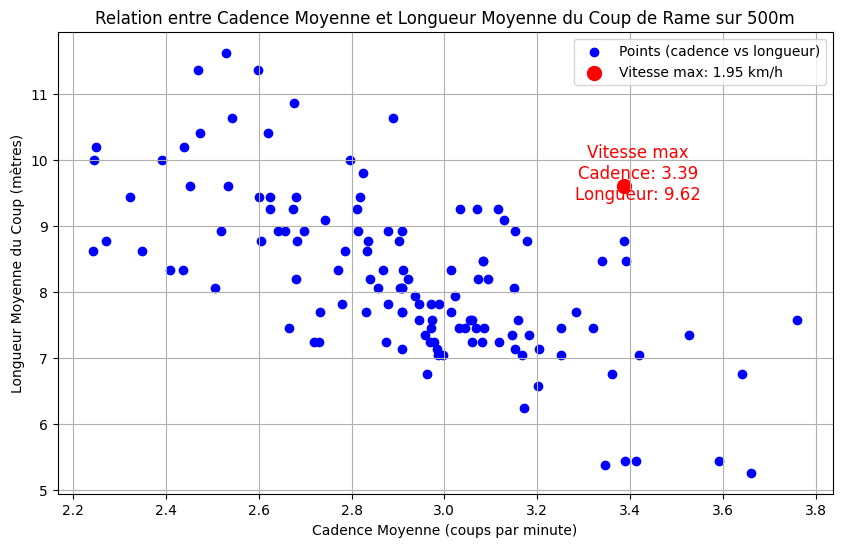

La vitesse maximale de 1.95 km/h est atteinte à une cadence de 3.39 coups par minute, avec une longueur de coup de rame de 9.62 mètres.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour tracer les points et identifier la cadence avec la vitesse maximale
def plot_cadence_vs_length(df):
    cadences = []
    lengths = []
    speeds = []

    # Récupérer les données des portions de 500m
    for i in range(1, 5):
        cadences.extend(df[f'cadence_split_{i}_500m'])
        lengths.extend(df[f'longueur_moyenne_split_{i}_par_coup'])
        speeds.extend(df[f'vitesse_moyenne_split_{i}_kmh'])

    # Créer un DataFrame temporaire pour faciliter l'analyse
    temp_df = pd.DataFrame({
        'cadence': cadences,
        'length': lengths,
        'speed': speeds
    })

    # Trouver la cadence où la vitesse est maximale
    max_speed_index = temp_df['speed'].idxmax()
    max_speed = temp_df['speed'].max()
    max_cadence = temp_df.loc[max_speed_index, 'cadence']
    max_length = temp_df.loc[max_speed_index, 'length']

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.scatter(temp_df['cadence'], temp_df['length'], c='blue', label='Points (cadence vs longueur)')

    # Mettre en évidence le point correspondant à la vitesse maximale
    plt.scatter(max_cadence, max_length, color='red', s=100, label=f'Vitesse max: {max_speed:.2f} km/h')

    # Annoter le point de vitesse maximale
    plt.annotate(f'Vitesse max\nCadence: {max_cadence:.2f}\nLongueur: {max_length:.2f}',
                 (max_cadence, max_length),
                 textcoords="offset points", xytext=(10,-10), ha='center', fontsize=12, color='red')

    # Ajouter des titres et des labels
    plt.title('Relation entre Cadence Moyenne et Longueur Moyenne du Coup de Rame sur 500m')
    plt.xlabel('Cadence Moyenne (coups par minute)')
    plt.ylabel('Longueur Moyenne du Coup (mètres)')
    plt.legend()
    plt.grid(True)

    # Afficher le graphique
    plt.show()

    return max_cadence, max_speed, max_length

# Appliquer la fonction sur ton DataFrame
max_cadence, max_speed, max_length = plot_cadence_vs_length(df_final_with_metrics)

# Afficher les résultats
print(f"La vitesse maximale de {max_speed:.2f} km/h est atteinte à une cadence de {max_cadence:.2f} coups par minute, avec une longueur de coup de rame de {max_length:.2f} mètres.")
